# Objective

- Create a TV Price Prediction Algorithm (discounted/original price)
- Visualize and Analyze the result

In [4]:
'''
Import all the necessary libraries
'''
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [159]:
X = pickle.load(open('features.pickle',"rb"))
y_1 = pickle.load(open('original_price.pickle', 'rb'))
y_2 = pickle.load(open('discounted_price.pickle', 'rb'))

# Original Price Analysis

In [160]:
'''
Split the training and the testing data
'''
X_train, X_test, y_train, y_test = train_test_split(X, y_1, test_size=0.3, random_state=101)

In [161]:
'''
Declare and instance of Linear Regression
'''
lm = LinearRegression()

In [162]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [163]:
# print the intercept
print(lm.intercept_)

-8348.083642487116


In [164]:
original_price_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [165]:
original_price_df.sort_values(by='Coefficient',ascending=False,inplace=True)

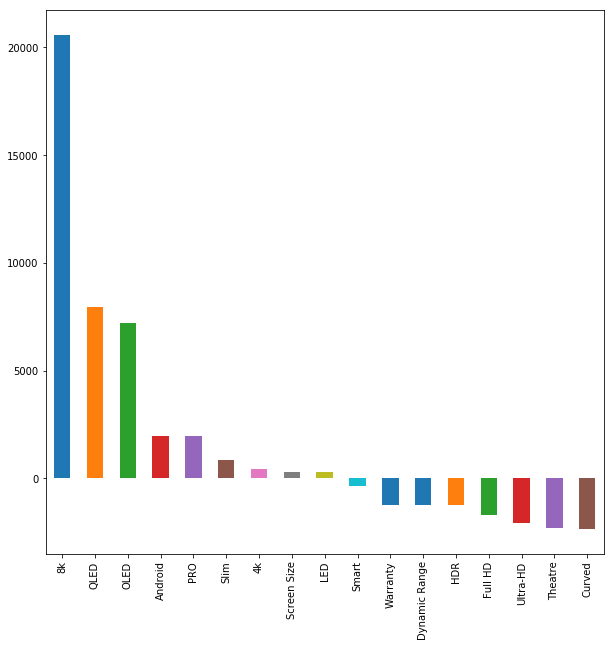

In [166]:
plt.figure(figsize=(10,10))
original_price_df['Coefficient'].plot(kind='bar')

In [167]:
original_price_df

,Coefficient
8k,20582.945586
QLED,7933.882308
OLED,7197.483911
Android,1985.085408
PRO,1950.905952
Slim,845.802957
4k,438.852398
Screen Size,309.937385
LED,299.952067
Smart,-366.173937


# Analysis

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **features** is associated with an **increase of N amount **.

# Prediction Model

In [168]:
predictions = lm.predict(X_test)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [169]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2221.740658820499
MSE: 8075645.402846766
RMSE: 2841.7680065140376


Since the metrics we are evaluating is error.
The lower the value the higher the accuracy of the prediction model will become.


# Prediction Model Evaluation

In [130]:
'''
Let's check some random test data
'''
y_test=list(y_test)
print(y_test[30])
print(y_test[20])
print(y_test[9])

2699
4239
11659


In [131]:
print(predictions[30])
print(predictions[20])
print(predictions[9])

3037.617876221837
5796.689132336425
15209.985974233332


In [132]:
result_df = pd.DataFrame({'True Value':y_test,'Predictions': predictions})

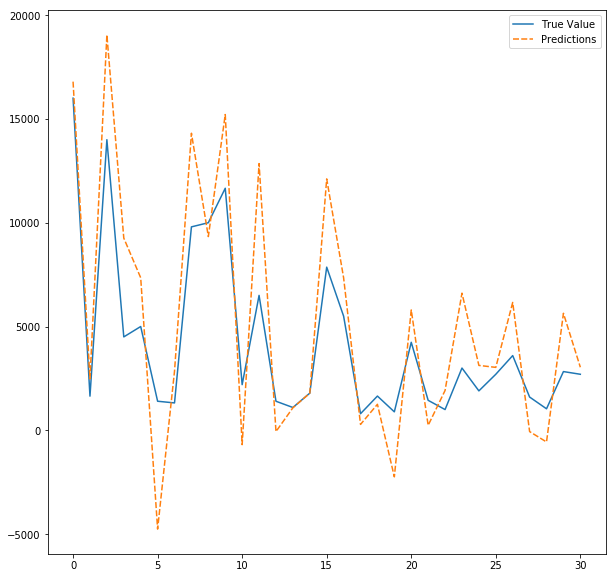

In [133]:
plt.figure(figsize=(10,10))
sns.lineplot(data=result_df)

# Disconted Price Analysis

Let's apply the same algorithm to the discounted price. 

In [143]:
'''
Split the training and the testing data
'''
X_train, X_test, y_train, y_test = train_test_split(X, y_2, test_size=0.3, random_state=101)

In [144]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [145]:
# print the intercept
print(lm.intercept_)

-8532.126893742938


In [146]:
discounted_price_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [147]:
discounted_price_df.sort_values(by='Coefficient',ascending=False,inplace=True)

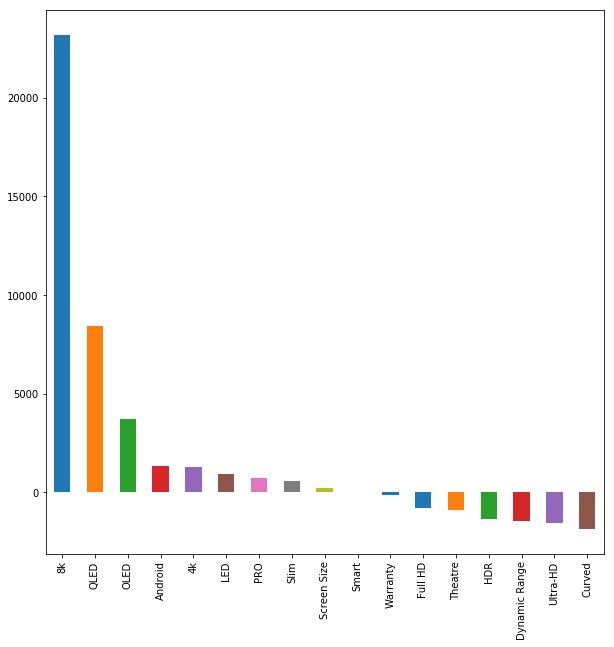

In [148]:
plt.figure(figsize=(10,10))
discounted_price_df['Coefficient'].plot(kind='bar')

In [154]:
predictions = lm.predict(X_test)

In [155]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1530.7893727298285
MSE: 5128975.514395507
RMSE: 2264.724158566669


In [156]:
result_df = pd.DataFrame({'True Value':y_test,'Predictions': predictions})

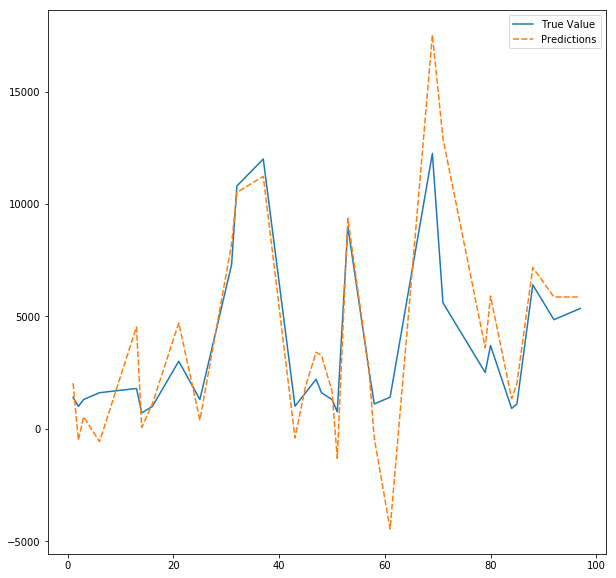

In [157]:
plt.figure(figsize=(10,10))
sns.lineplot(data=result_df)

# Conclusions


- Based on upon the evaluation metrics for each model, since the error is the minimal the result the higher the accuracy, it is     evaluated that the model performs well under discounted price.
    See data below for comparison:

    
    Original Price
    MAE: 2221.740658820499
    MSE: 8075645.402846766
    RMSE: 2841.7680065140376


    Discounted Price
    MAE: 1530.7893727298285
    MSE: 5128975.514395507
    RMSE: 2264.724158566669

- The top5 features that are highly correlated with the price are the following:

    - 8k - It makes sense because it is the highest resolution of television as of the date.
    - QLED - It has been a part of 8k technology.
    - OLED - Is the technology before QLED a lot of 4k TV is using OLED
    - Android - Ofcourse if your TV is running Android OS in it deserve additional cost because of it's technical capabilities
    - 4k - Is the technology but still being valued because of it's major advantage vs typical HD TV 
    
    
- Based on the evaluation Curve TV technology not highly appreciated as of the moment maybe because consumer preffer the Technology rather than the formfactor